In [ ]:
!pip install nilearn

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, r2_score

# **Dataset A**

In [3]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=200) # this needs  to be modified for some tasks
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

### **Question 1**

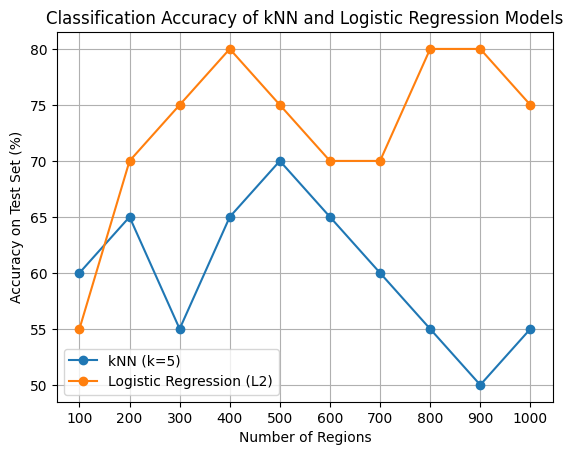

In [6]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
regions=list(range(100, 1100, 100)) # List of atlas resolutions
knn_accuracies, logreg_accuracies = [], [] # Lists to store accuracies

for region in regions: # Iterate over different atlas resolutions
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=region) # Set number of regions
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

    # Set first 80 brain scans as train data & last 20 as test data
    X_train, y_train = input_variables[:80], output_variable[:80]
    X_test, y_test = input_variables[80:], output_variable[80:]

    knn_model_q1 = KNeighborsClassifier(n_neighbors=5) # Create kNN model, n=5
    knn_model_q1.fit(X_train, y_train) # Fit model on train data
    knn_accuracy = knn_model_q1.score(X_test, y_test)*100 # Calculate accuracy on test data
    knn_accuracies.append(knn_accuracy) # Add accuracy to list

    log_model_q1 = LogisticRegression(penalty='l2', C=1.0) # Create log model, l2 penalty
    log_model_q1.fit(X_train, y_train) # Fit model on train data
    logreg_accuracy = log_model_q1.score(X_test, y_test)*100 # Calculate accuracy on test data
    logreg_accuracies.append(logreg_accuracy) # Add accuracy to list

# Plotting results
plt.plot(regions, knn_accuracies, label="kNN (k=5)", marker='o')
plt.plot(regions, logreg_accuracies, label="Logistic Regression (L2)", marker='o')
plt.xlabel("Number of Regions")
plt.ylabel("Accuracy on Test Set (%)")
plt.xticks(regions)
plt.title("Classification Accuracy of kNN and Logistic Regression Models")
plt.legend()
plt.grid(True)
plt.show()

### **Question 2**

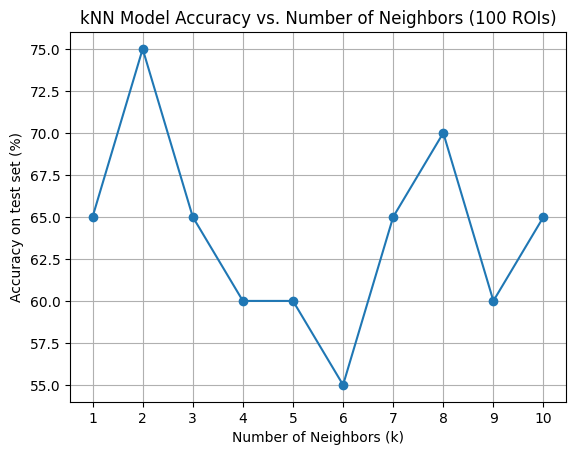

In [7]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set number of regions = 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

# Set first 80 brain scans as train data & last 20 as test data
X_train, y_train = input_variables[:80], output_variable[:80]
X_test, y_test = input_variables[80:], output_variable[80:]

neighbors = list(range(1, 11)) # List of n_neighbors values for kNN
knn_accuracies = [] # List to store accuracies

for n in neighbors: # Iterate through n_neighbors values for kNN
    knn_model = KNeighborsClassifier(n_neighbors=n) # Create kNN model
    knn_model.fit(X_train, y_train) # Fit model on train data
    knn_accuracy = knn_model.score(X_test, y_test)*100 # Calculate accuracy on test data
    knn_accuracies.append(knn_accuracy) # Add accuracy to list

# Plotting the results
plt.plot(neighbors, knn_accuracies, marker='o', label="kNN accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on test set (%)")
plt.title("kNN Model Accuracy vs. Number of Neighbors (100 ROIs)")
plt.grid(True)
plt.xticks(neighbors)
plt.show()

### **Question 3**

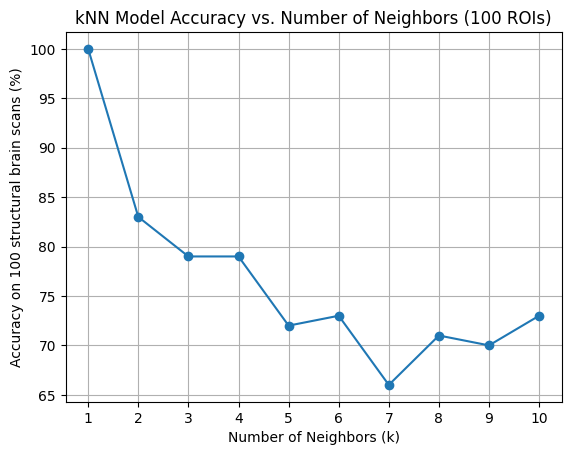

In [8]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set number of regions = 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

neighbors = list(range(1, 11)) # Variables to store results
knn_accuracies = [] # List to store accuracies

for n in neighbors: # Iterate over different n_neighbors values for kNN
    knn_model = KNeighborsClassifier(n_neighbors=n) # Create kNN model
    knn_model.fit(input_variables, output_variable) # Fit model on all data
    knn_accuracy = knn_model.score(input_variables, output_variable)*100 # Calculate accuracy
    knn_accuracies.append(knn_accuracy) # Add accuracy to list

# Plotting the results
plt.plot(neighbors, knn_accuracies, marker='o', label="kNN accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on 100 structural brain scans (%)")
plt.title("kNN Model Accuracy vs. Number of Neighbors (100 ROIs)")
plt.grid(True)
plt.xticks(neighbors)
plt.show()

### **Question 4**

,Training Size,kNN Accuracy (%),Logistic Regression Accuracy (%)
0,10,75.0,65.0
1,20,85.0,75.0
2,30,80.0,65.0
3,40,70.0,90.0
4,50,60.0,75.0
5,60,60.0,75.0
6,70,60.0,75.0
7,80,65.0,55.0


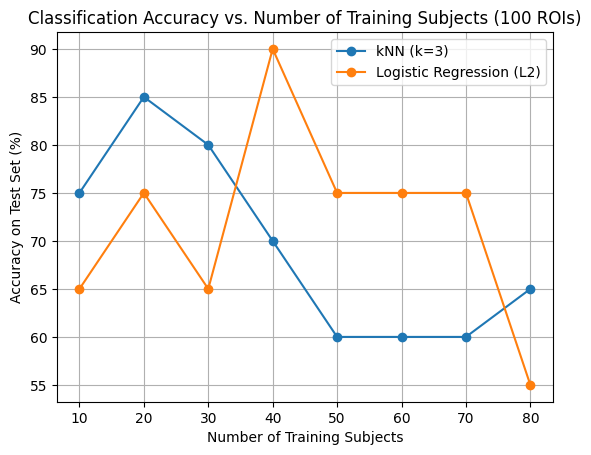

In [14]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set number of regions = 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

# Set first 80 brain scans as train data & last 20 as test data
X_train, y_train = input_variables[:80], output_variable[:80]
X_test, y_test = input_variables[80:], output_variable[80:]

train_sizes = [10, 20, 30, 40, 50, 60, 70, 80] # Number of training subjects
knn_accuracies, logreg_accuracies = [], [] # Lists to store accuracies

for train_size in train_sizes: # Iterate through training sizes
    X_train_subset = X_train[0:train_size] # Get first 'train_size' subjects
    y_train_subset = y_train[0:train_size] # Get first 'train_size' labels
    
    knn_model = KNeighborsClassifier(n_neighbors=3) # Create kNN model, n=3
    knn_model.fit(X_train_subset, y_train_subset) # Fit on subset of train data
    knn_accuracy = knn_model.score(X_test, y_test)*100 # Calculate accuracy on test data
    knn_accuracies.append(knn_accuracy) # Add accuracy to list
    
    logreg_model = LogisticRegression(penalty='l2', C=1.0) # Create log model, l2 penalty
    logreg_model.fit(X_train_subset, y_train_subset) # Fit on subset of train data
    logreg_accuracy = logreg_model.score(X_test, y_test) * 100 # Calculate accuracy on test data
    logreg_accuracies.append(logreg_accuracy) # Add accuracy to list

# Create a table of results
data=pd.DataFrame({'Training Size': train_sizes, 'kNN Accuracy (%)': knn_accuracies, 
                   'Logistic Regression Accuracy (%)': logreg_accuracies})
display(data)

# Plotting the results
plt.plot(train_sizes, knn_accuracies, marker='o', label="kNN (k=3)")
plt.plot(train_sizes, logreg_accuracies, marker='o', label="Logistic Regression (L2)")
plt.xlabel("Number of Training Subjects")
plt.ylabel("Accuracy on Test Set (%)")
plt.title("Classification Accuracy vs. Number of Training Subjects (100 ROIs)")
plt.legend()
plt.grid(True)
plt.show()

### **Question 5**

,Number of ROIs,KNN Accuracy (%),Logistic Regression Accuracy (%)
0,10,70.0,45.0
1,20,60.0,55.0
2,30,80.0,60.0
3,40,60.0,50.0
4,50,75.0,55.0
5,60,75.0,60.0
6,70,60.0,55.0
7,80,60.0,65.0
8,90,70.0,65.0
9,100,65.0,65.0


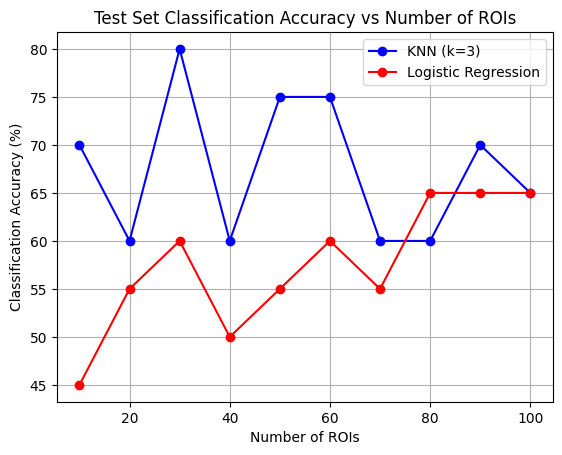

In [29]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set number of regions = 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

# Split data into training (first 80) and test sets (last 20)
X_train, X_test = input_variables[:80], input_variables[80:]
y_train, y_test = output_variable[:80], output_variable[80:]

knn_accuracies, log_accuracies = [], [] # Initialize arrays to store test accuracies
regions = list(range(10, 101, 10)) # Number of ROIs

for region in regions: # Iterate over ROIs
    X_train_subset = X_train[:, :region] # Select first 'region' ROIs
    X_test_subset = X_test[:, :region] # Select first 'region' ROIs
    
    knn = KNeighborsClassifier(n_neighbors=3) # Create kNN model, k=3
    knn.fit(X_train_subset, y_train) # Fit model on train data
    knn_pred = knn.predict(X_test_subset) # Predict on test data
    knn_accuracy = accuracy_score(y_test, knn_pred) # Get accuracy score
    knn_accuracies.append(knn_accuracy * 100)  # Convert to percentage & add to list

    log_model_q5 = LogisticRegression(penalty='l2', C=1.0) # Create log model, l2 penalty
    log_model_q5.fit(X_train_subset, y_train) # Fit model on train data
    log_pred = log_model_q5.predict(X_test_subset) # Predict on test data
    log_accuracy = accuracy_score(y_test, log_pred) # Get accuracy score
    log_accuracies.append(log_accuracy*100)  # Convert to percentage

# Create a table of results
accuracy_table = pd.DataFrame({'Number of ROIs': regions, 'KNN Accuracy (%)': knn_accuracies,
                               'Logistic Regression Accuracy (%)': logreg_accuracies})
display(accuracy_table)

# Plotting the test accuracies for both models
plt.plot(regions, knn_accuracies, marker='o', label='KNN (k=3)', color='blue')
plt.plot(regions, logreg_accuracies, marker='o', label='Logistic Regression', color='red')
plt.xlabel('Number of ROIs')
plt.ylabel('Classification Accuracy (%)')
plt.title('Test Set Classification Accuracy vs Number of ROIs')
plt.legend()
plt.grid(True)
plt.show()

# **Dataset B**

In [33]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:,None])[:,0] # gives subject age on standard units after z-scoring

### **Question 6** 

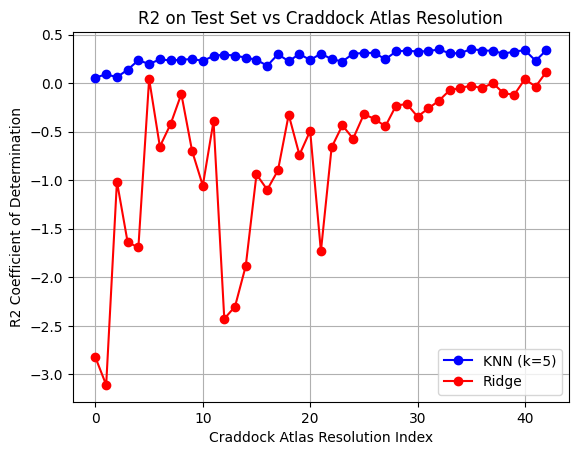

In [43]:
knn_r2_scores, ridge_r2_scores  = [], [] # Lists for R2 scores
atlas_indices = list(range(43))  # 43 resolutions

for i in atlas_indices: # Iterate over atlas resolutions
    atlas_nii = index_img(crad['scorr_mean'], i)
    masker = NiftiLabelsMasker(labels_img=atlas_nii, standardize=True)
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    
    # Split data into training (first 80) and test sets (last 20)
    X_train, X_test = input_variables[:80], input_variables[80:]
    y_train, y_test = output_variable[:80], output_variable[80:]

    knn_q6 = KNeighborsRegressor(n_neighbors=5) # Create kNN model, k=5
    knn_q6.fit(X_train, y_train) # Fit model on train data
    knn_pred = knn_q6.predict(X_test) # Predict on test data
    knn_r2 = r2_score(y_test, knn_pred) # Get R2 score
    knn_r2_scores.append(knn_r2)  # Add to list
    
    ridge_q6 = Ridge() # Create Ridge model
    ridge_q6.fit(X_train, y_train) # Fit model on train data
    ridge_pred = ridge_q6.predict(X_test) # Predict on test data
    ridge_r2 = r2_score(y_test, ridge_pred) # Get R2 score
    ridge_r2_scores.append(ridge_r2) # Add to list

# Plot the R2 scores for both model
plt.plot(atlas_indices, knn_r2_scores, marker='o', label='KNN (k=5)', color='blue')
plt.plot(atlas_indices, ridge_r2_scores, marker='o', label='Ridge', color='red')
plt.xlabel('Craddock Atlas Resolution Index')
plt.ylabel('R2 Coefficient of Determination')
plt.title('R2 on Test Set vs Craddock Atlas Resolution')
plt.legend()
plt.grid(True)
plt.show()

### **Question 7**

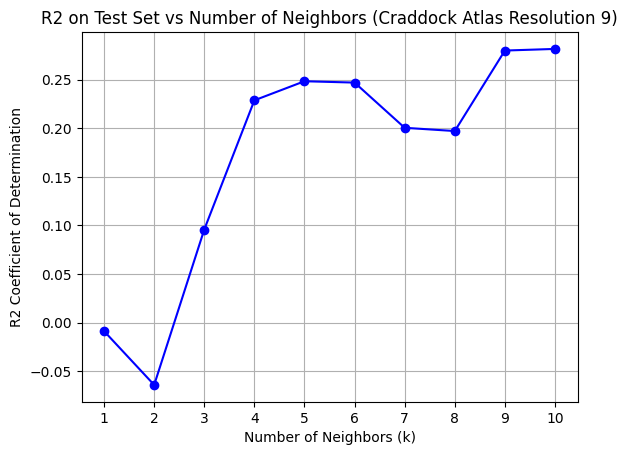

In [39]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 9)
masker = NiftiLabelsMasker(labels_img=atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0]

# Split data into training (first 80) and test sets (last 20)
X_train, X_test = input_variables[:80], input_variables[80:]
y_train, y_test = output_variable[:80], output_variable[80:]

knn_r2_scores = [] # List for R2 scores

for n in range(1, 11): # Iterate over n_neighbors values
    knn = KNeighborsRegressor(n_neighbors=n) # Create kNN model
    knn.fit(X_train, y_train) # Fit model on train data
    knn_pred = knn.predict(X_test) # Predict on test data
    knn_r2 = r2_score(y_test, knn_pred) # Get R2 score
    knn_r2_scores.append(knn_r2) # Add to list

# Plot the R2 scores for KNeighborsRegressor with different n_neighbors
plt.plot(range(1, 11), knn_r2_scores, marker='o', label='KNN R2', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R2 Coefficient of Determination')
plt.xticks(range(1, 11))
plt.title('R2 on Test Set vs Number of Neighbors (Craddock Atlas Resolution 9)')
plt.grid(True)
plt.show()

### **Question 8**

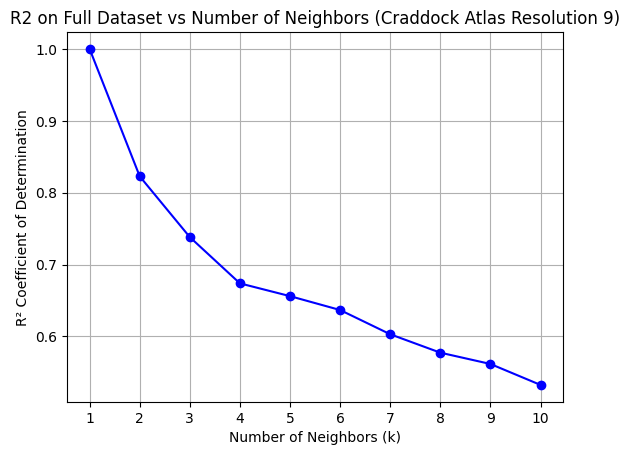

In [41]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 9)
masker = NiftiLabelsMasker(labels_img=atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0]

knn_r2_scores = [] # List for R2 scores

for n in range(1, 11): # Iterate over n_neighbors values
    knn = KNeighborsRegressor(n_neighbors=n) # Create kNN model
    knn.fit(input_variables, output_variable) # Fit model on full dataset
    knn_pred = knn.predict(input_variables) # Predict on full dataset
    knn_r2 = r2_score(output_variable, knn_pred) # Get R2 score
    knn_r2_scores.append(knn_r2) # Add to list

# Plot the R2 scores for KNeighborsRegressor with different n_neighbors
plt.plot(range(1, 11), knn_r2_scores, marker='o', label='KNN R2', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Coefficient of Determination')
plt.xticks(range(1, 11))
plt.title('R2 on Full Dataset vs Number of Neighbors (Craddock Atlas Resolution 9)')
plt.grid(True)
plt.show()

### **Question 9**

,Number of Training Subjects,KNN R2,Ridge R2
0,10,0.334645,-0.893115
1,20,0.474073,-0.179491
2,30,0.254329,-0.359059
3,40,0.212697,-1.361932
4,50,0.320395,-1.420056
5,60,0.273886,-1.340367
6,70,0.291263,-1.318668
7,80,0.095829,-0.698165


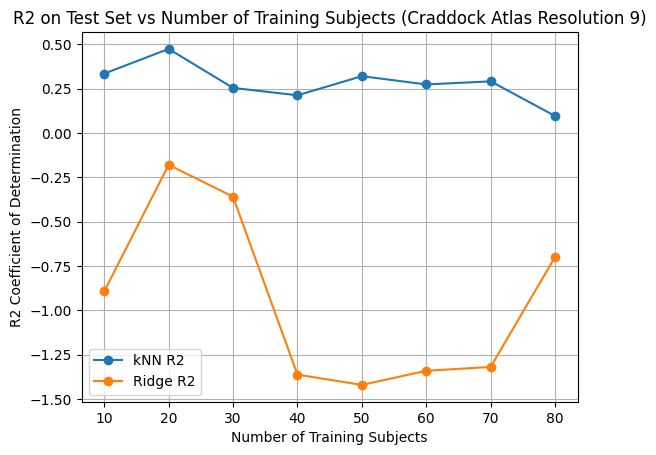

In [45]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 9)
masker = NiftiLabelsMasker(labels_img=atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0]

# Split data into training (first 80) and test sets (last 20)
X_train, X_test = input_variables[:80], input_variables[80:]
y_train, y_test = output_variable[:80], output_variable[80:]

knn_r2_scores, ridge_r2_scores = [], [] # Lists for R2 scores
train_sizes = list(range(10, 90, 10)) # Number of training subjects

for train_size in train_sizes: # Iterate through training sizes
    X_train_subset = X_train[0:train_size] # Get first 'train_size' subjects
    y_train_subset = y_train[0:train_size]  # Get first 'train_size' labels
    
    knn_q9 = KNeighborsRegressor(n_neighbors=3) # Create kNN model, n=3
    knn_q9.fit(X_train_subset, y_train_subset) # Fit on subset of train data
    knn_pred = knn_q9.predict(X_test) # Predict on test data
    knn_r2_scores.append(r2_score(y_test, knn_pred)) # Get R2 score

    ridge_q9 = Ridge() # Create Ridge model
    ridge_q9.fit(X_train_subset, y_train_subset) # Fit on subset of train data
    ridge_pred = ridge_q9.predict(X_test) # Predict on test data
    ridge_r2_scores.append(r2_score(y_test, ridge_pred)) # Get R2 score

# Make table of results
r2_table = pd.DataFrame({'Number of Training Subjects': train_sizes,
                         'KNN R2': knn_r2_scores, 'Ridge R2': ridge_r2_scores})
display(r2_table)

# Plotting the results
plt.plot(train_sizes, knn_r2_scores, marker='o', label="kNN R2")
plt.plot(train_sizes, ridge_r2_scores, marker='o', label="Ridge R2")
plt.xlabel("Number of Training Subjects")
plt.ylabel('R2 Coefficient of Determination')
plt.title('R2 on Test Set vs Number of Training Subjects (Craddock Atlas Resolution 9)')
plt.legend()
plt.grid(True)
plt.show()

### **Question 10**

,Number of ROIs,KNN R2,Ridge R2
0,10,-0.016183,-1.075904
1,20,-0.044367,-0.703597
2,30,0.136050,-1.286831
3,40,0.017658,-1.432687
4,50,0.170941,-0.580965
5,60,0.123742,-0.685388
6,70,0.154319,-0.639806
7,80,0.205572,-0.753711
8,90,0.115454,-0.396212
9,100,0.095829,-0.698165


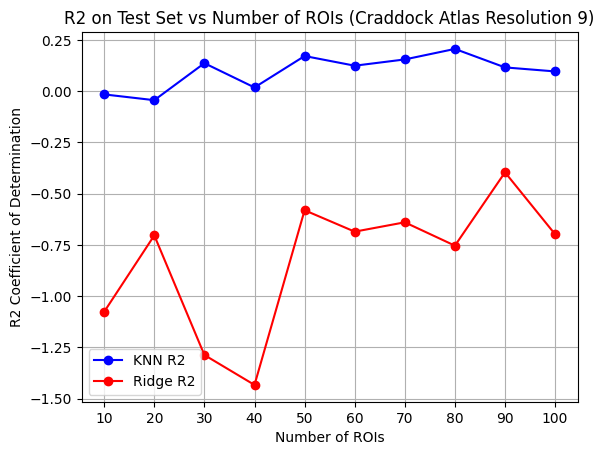

In [47]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) # Load dataset
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 9)
masker = NiftiLabelsMasker(labels_img=atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0]

# Split data into training (first 80) and test sets (last 20)
X_train, X_test = input_variables[:80], input_variables[80:]
y_train, y_test = output_variable[:80], output_variable[80:]

regions = list(range(10, 110, 10)) # Number of ROIs
knn_r2_scores, ridge_r2_scores = [], [] # Lists for R2 scores

for region in regions: # Iterate over ROIs
    X_train_subset = X_train[:, :region] # Select the first 'region' ROIs
    X_test_subset = X_test[:, :region] # Select the first 'region' ROIs
    
    knn_q10 = KNeighborsRegressor(n_neighbors=3) # Create kNN model, n=3
    knn_q10.fit(X_train_subset, y_train) # Fit model on train data
    knn_pred = knn_q10.predict(X_test_subset) # Predict on test data
    knn_r2_scores.append(r2_score(y_test, knn_pred)) # Get R2 score

    ridge_q10 = Ridge() # Create Ridge model
    ridge_q10.fit(X_train_subset, y_train) # Fit model on train data
    ridge_pred = ridge_q10.predict(X_test_subset) # Predict on test data
    ridge_r2_scores.append(r2_score(y_test, ridge_pred)) # Get R2 score

# Create table of results
r2_table = pd.DataFrame({'Number of ROIs': regions, 'KNN R2': knn_r2_scores, 
                         'Ridge R2': ridge_r2_scores})
display(r2_table)

# Plotting the test accuracies for both models
plt.plot(regions, knn_r2_scores, marker='o', label='KNN R2', color='blue')
plt.plot(regions, ridge_r2_scores, marker='o', label='Ridge R2', color='red')
plt.xlabel('Number of ROIs')
plt.ylabel('R2 Coefficient of Determination')
plt.xticks(regions)
plt.title('R2 on Test Set vs Number of ROIs (Craddock Atlas Resolution 9)')
plt.legend()
plt.grid(True)
plt.show()